In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
swimming = pd.read_csv(os.path.join("data/Summer_events/summer_male_Swimming.csv"))
swimming.head()

,Age,Height,Weight,Team,Year,City,Event,Medal
0,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 100 metres Butterfly,---
1,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 200 metres Butterfly,---
2,21,194,78.0,Netherlands,1996,Atlanta,Swimming Men's 4 x 100 metres Medley Relay,---
3,25,194,78.0,Netherlands,2000,Sydney,Swimming Men's 100 metres Butterfly,---
4,25,194,78.0,Netherlands,2000,Sydney,Swimming Men's 200 metres Butterfly,---


In [3]:
swimmingcopied = swimming.copy()

swimming_dummies = pd.get_dummies(swimmingcopied, columns=["Team", "Year", "City", "Event"])
swimming_dummies.head()

,Age,Height,Weight,Medal,Team_Algeria,Team_Andorra,Team_Argentina,Team_Aruba,Team_Australasia,Team_Australia,...,Event_Swimming Men's 200 metres Freestyle,Event_Swimming Men's 200 metres Individual Medley,Event_Swimming Men's 4 x 100 metres Freestyle Relay,Event_Swimming Men's 4 x 100 metres Medley Relay,Event_Swimming Men's 4 x 200 metres Freestyle Relay,"Event_Swimming Men's 4,000 metres Freestyle",Event_Swimming Men's 400 metres Breaststroke,Event_Swimming Men's 400 metres Freestyle,Event_Swimming Men's 400 metres Individual Medley,Event_Swimming Men's 50 metres Freestyle
0,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,194,78.0,---,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,25,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,194,78.0,---,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Replace string with integers for Medals column
swimming_dummies = swimming_dummies.replace({"Medal": {"---":0}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Gold":1}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Silver":2}})
swimming_dummies = swimming_dummies.replace({"Medal": {"Bronze":3}})
swimming_dummies

,Age,Height,Weight,Medal,Team_Algeria,Team_Andorra,Team_Argentina,Team_Aruba,Team_Australasia,Team_Australia,...,Event_Swimming Men's 200 metres Freestyle,Event_Swimming Men's 200 metres Individual Medley,Event_Swimming Men's 4 x 100 metres Freestyle Relay,Event_Swimming Men's 4 x 100 metres Medley Relay,Event_Swimming Men's 4 x 200 metres Freestyle Relay,"Event_Swimming Men's 4,000 metres Freestyle",Event_Swimming Men's 400 metres Breaststroke,Event_Swimming Men's 400 metres Freestyle,Event_Swimming Men's 400 metres Individual Medley,Event_Swimming Men's 50 metres Freestyle
0,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,194,78.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,25,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,194,78.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,25,193,85.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1368,20,190,82.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1369,15,178,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,19,178,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<!-- dummy df exported, now importing again to make it easier for random forest tree due to x and x copy -->

In [21]:
y = swimming_dummies["Medal"].values.reshape(-1, 1)
X = swimming_dummies.drop("Medal", axis=1)
target_names = ["---", "Gold", "Silver", "Bronze"]
# feature_names = data.columns
print(X.shape, y.shape)

(1372, 189) (1372, 1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [24]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.913


In [25]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         ---       0.94      0.98      0.96       311
        Gold       0.46      0.50      0.48        12
      Silver       0.67      0.33      0.44         6
      Bronze       0.00      0.00      0.00        14

    accuracy                           0.91       343
   macro avg       0.52      0.45      0.47       343
weighted avg       0.88      0.91      0.89       343



In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

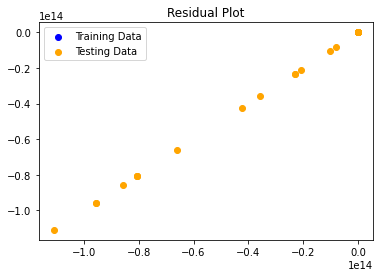

In [10]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [11]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.940814451534376e+26, R2: -1.706126194004566e+26


In [12]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9958234454072568, R2: 0.12459407777492837


In [13]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0505727920259755, R2: 0.07646516246466606


In [14]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0152805908175944, R2: 0.1074897402536944
